Nama : Andhika Bayu P NIM : 201351014 Kelas : Informatika Pagi B


1. BUSINES UNDERSTANDING

    Analisis penggunaan kartu kredit bertujuan untuk mendapatkan wawasan yang berguna tentang perilaku penggunaan kartu kredit oleh pelanggan. Hal ini dapat membantu lembaga keuangan atau perusahaan penerbit kartu kredit untuk memahami pola pengeluaran, kebiasaan pembelian, preferensi pelanggan, dan potensi risiko terkait kartu kredit. Informasi ini dapat digunakan untuk pengambilan keputusan bisnis yang lebih baik, pengembangan strategi pemasaran yang efektif, pengendalian risiko, serta perbaikan produk dan layanan yang ditawarkan.
    Melalui analisis data kartu kredit, perusahaan dapat mengoptimalkan operasional dan strategi bisnis mereka berdasarkan pemahaman yang lebih baik tentang pelanggan mereka. Dengan demikian, bisnis dapat meningkatkan kepuasan pelanggan, memperoleh keunggulan kompetitif, dan mengoptimalkan pertumbuhan bisnis mereka.

    Dataset :(https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

2. Data Understanding
    Dataset Customers Credit memiliki detail sebagai berikut:

    CUST_ID : Identifikasi pemegang Kartu Kredit (Kategoris)
    BALANCE : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
    BALANCE_FREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
    PURCHASES : Jumlah pembelian yang dilakukan dari akun
    ONEOFF_PURCHASES : Jumlah pembelian maksimum yang dilakukan dalam sekali jalan
    INSTALLMENTS_PURCHASES : Jumlah pembelian yang dilakukan dengan angsuran
    CASH_ADVANCE : Uang muka yang diberikan oleh pengguna
    PURCHASES_FREQUENCY : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli) ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
    PURCHASESINSTALLMENTSFREQUENCY : Seberapa sering pembelian dengan mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
    CASHADVANCEFREQUENCY : Seberapa sering uang muka dibayarkan
    CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advance"
    PURCHASES_TRX : Jumlah transaksi pembelian yang dilakukan
    CREDIT_LIMIT : Batas Kartu Kredit untuk pengguna
    PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna
    MINIMUM_PAYMENTS : Jumlah minimum pembayaran yang dilakukan oleh pengguna
    PRCFULLPAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna
    TENURE : Tenor layanan kartu kredit untuk pengguna

3. Data Preparation
    Tahap ini secara garis besar di pakai untuk memperbaiki masalah dalam data, sangat jelas bahwa dalam tahap ini membutuhkan pemikiran yang cukup matang dan usaha yang cukup tinggi untuk memastikan data tepat untuk algoritma yang digunakan dan proses data dapat menuju model berkualitas yang berguna. Terdapat 18 data  dengan 2 atribut dengan tipe data yang digunakan yaitu numeric dan artibut data yang diambil yaitu : BALANCE	dan PURCHASES.

4. Modelling
    Tahap modelling dalam Clustering Customers adalah proses pembuatan model atau algoritma machine learning yang dapat digunakan untuk menganalisis data pelanggan secara rinci.

5. Evaluasi
    Pada tahap evaluasi, kita dapat menggunakan metrik-metrik ini untuk mengevaluasi kualitas clustering yang dihasilkan dari model atau algoritma yang telah dibangun. Perlu diingat bahwa evaluasi harus dilakukan dengan mempertimbangkan tujuan bisnis dan konteks data yang spesifik.Saat menggunakan dataset pelanggan toko yang telah dijelaskan sebelumnya, kita dapat menerapkan algoritma clustering seperti K-Means, Hierarchical Clustering, atau algoritma lain yang sesuai untuk mendapatkan clustering yang optimal. Setelah itu, kita dapat menggunakan metrik evaluasi dan visualisasi untuk mengevaluasi kualitas dan interpretasi dari hasil clustering tersebut.

#Import library yang dibutuhkan

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Membaca Dataset

In [2]:
df = pd.read_csv('cc_general.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#Persiapan Dataset

In [4]:
df.rename(index=str, columns={
    'BALANCE' : 'Balance',
    'PURCHASES': 'Purchases' 
},inplace=True)

In [8]:
X = df.drop(['CUST_ID','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'],axis=1)

In [9]:
print(X)

          Balance  BALANCE_FREQUENCY  Purchases
0       40.900749           0.818182      95.40
1     3202.467416           0.909091       0.00
2     2495.148862           1.000000     773.17
3     1666.670542           0.636364    1499.00
4      817.714335           1.000000      16.00
...           ...                ...        ...
8945    28.493517           1.000000     291.12
8946    19.183215           1.000000     300.00
8947    23.398673           0.833333     144.40
8948    13.457564           0.833333       0.00
8949   372.708075           0.666667    1093.25

[8950 rows x 3 columns]


#Menentukan jumlah cluster dengan Elbow

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

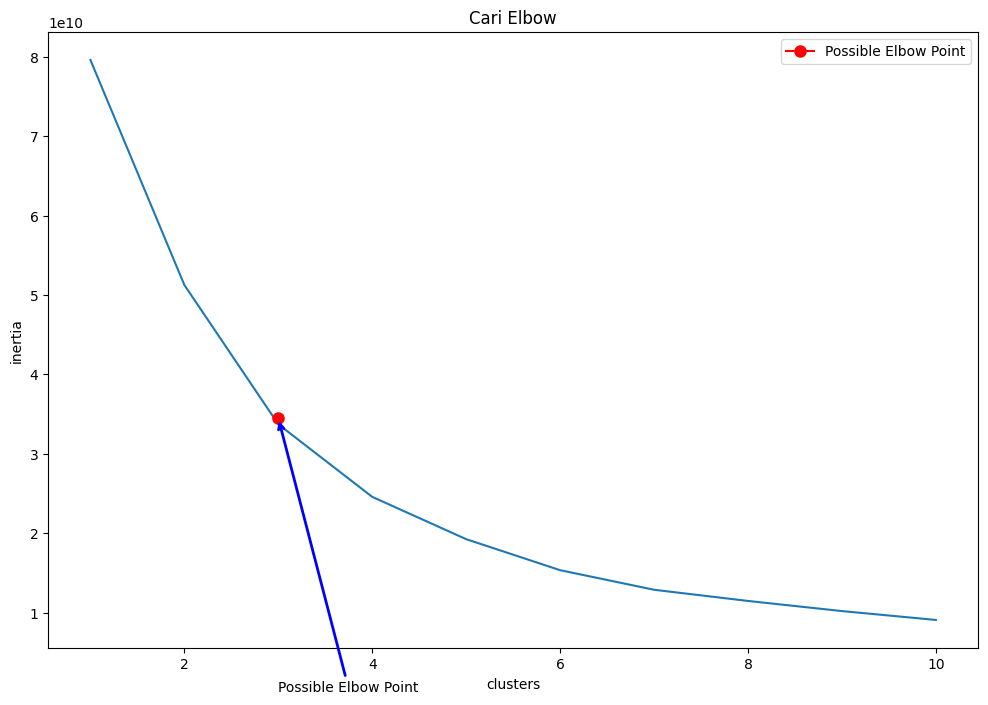

In [26]:
clusters=[]
for i in range(1,11):
    km = KMeans (n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

# Find the elbow point
elbow_point = None
for i in range(1, len(clusters) - 1):
    slope = clusters[i] - clusters[i + 1]
    if elbow_point is None or slope < elbow_point[1]:
        elbow_point = (i + 1, slope)

# Mark the elbow point on the plot
plt.plot(3, 34500000000, marker='o', markersize=8, color='red', label='Possible Elbow Point')
plt.legend()

#Panah
ax.annotate('Possible Elbow Point', xy=(3, 34500000000), xytext=(3, 3),
                     arrowprops=dict(color='blue', arrowstyle='->', lw=2))

# Display the plot
plt.show()

#Proses clustering

In [27]:
n_clust =  4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


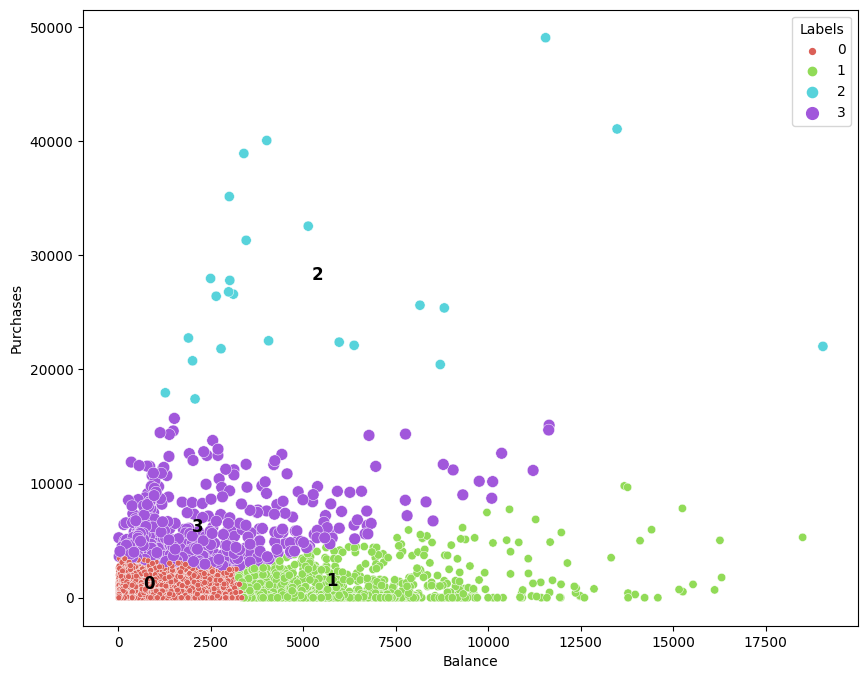

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Balance', y='Purchases', hue='Labels', markers=True, size='Labels', palette=sns.color_palette('hls', n_clust), data=X)

for label in X['Labels'].unique():
    plt.annotate(label,
                 (X[X['Labels']==label]['Balance'].mean(),
                  X[X['Labels']==label]['Purchases'].mean()),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center',
                 va='center',
                 size=12,
                 weight='bold',
                 color='black')
plt.show()


In [5]:
k_means=KMeans(n_clusters=4)
k_means.fit(df[['Purchases','Balance']])

NameError: name 'KMeans' is not defined

In [ ]:
df['cluster']=k_means.labels_

<Axes: xlabel='Balance', ylabel='Purchases'>

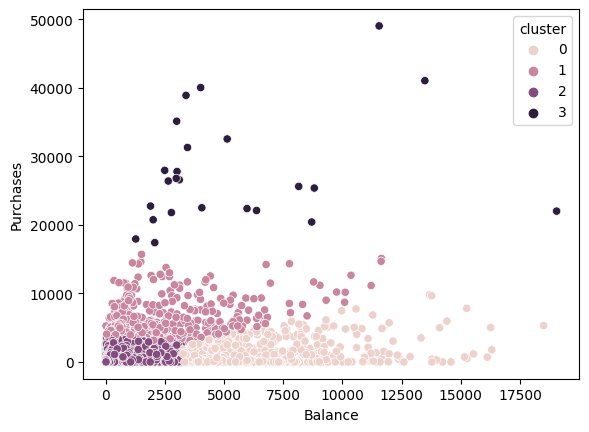

In [ ]:
sns.scatterplot(x = df['Balance'],y = df['Purchases'],hue=df['cluster'])

In [32]:
print(X)

          Balance  BALANCE_FREQUENCY  Purchases  Labels
0       40.900749           0.818182      95.40       0
1     3202.467416           0.909091       0.00       0
2     2495.148862           1.000000     773.17       0
3     1666.670542           0.636364    1499.00       0
4      817.714335           1.000000      16.00       0
...           ...                ...        ...     ...
8945    28.493517           1.000000     291.12       0
8946    19.183215           1.000000     300.00       0
8947    23.398673           0.833333     144.40       0
8948    13.457564           0.833333       0.00       0
8949   372.708075           0.666667    1093.25       0

[8950 rows x 4 columns]


In [36]:
X.to_excel("output_cc.xlsx")

In [38]:
import pickle

In [37]:
pickle.dump(kmean, open('output_ccg.sav','wb'))

Tujuannya adalah untuk mensegmentasi pelanggan untuk menentukan strategi pemasaran. Sayangnya warna plot berubah saat kernel ini dijalankan ulang - tetapi berikut beberapa pemikirannya:

Pembelanja Besar dengan Pembayaran besar - mereka melakukan pembelian mahal dan memiliki batas kredit antara rata-rata dan tinggi. Ini hanya sekelompok kecil pelanggan.
Uang Muka dengan Pembayaran besar - kelompok ini mengambil uang muka paling banyak. Mereka melakukan pembayaran besar, tetapi ini tampaknya hanya sekelompok kecil pelanggan.
Pembelanja Menengah dengan Pembayaran tertinggi ketiga - kelompok Pembelian tertinggi kedua (setelah Pembelanja Besar).
Batas Kredit Tertinggi tapi Hemat - grup ini tidak banyak melakukan pembelian. Sepertinya kelompok pelanggan terbesar ke-3.
Uang Muka dengan Pembayaran Kecil - kelompok ini suka mengambil uang muka, tetapi hanya melakukan pembayaran kecil.
Pembelanja Kecil dan Batas Kredit Rendah - mereka memiliki Saldo terkecil setelah Pembelanja Terkecil, Batas Kredit mereka berada di 3 grup terbawah, grup pelanggan terbesar kedua.
Pembelanja Terkecil dan Batas Kredit Terendah - ini adalah grup dengan batas kredit terendah tetapi mereka tampaknya tidak membeli banyak. Sayangnya ini tampaknya menjadi kelompok pelanggan terbesar.
Pembayaran Min Tertinggi - grup ini memiliki pembayaran minimum tertinggi (yang mungkin mengacu pada "Hutang Pembayaran Min" pada laporan bulanan. Ini mungkin mencerminkan fakta bahwa mereka memiliki Batas Kredit terendah kedua di grup, jadi sepertinya bank telah mengidentifikasi mereka sebagai risiko yang lebih tinggi.)
Jadi strategi pemasaran yang menargetkan lima kelompok pertama mungkin efektif.

In [39]:
import matplotlib
import seaborn
import pandas
import seaborn as sns
import sklearn
import openpyxl

print("Versi Seaborn:", sns.__version__)
print("Versi scikit-learn:", sklearn.__version__)
print("Versi openpyxl:", openpyxl.__version__)


print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", seaborn.__version__)
print("Pandas version:", pandas.__version__)


Versi Seaborn: 0.12.2
Versi scikit-learn: 1.2.2
Versi openpyxl: 3.1.2
Matplotlib version: 3.7.1
Seaborn version: 0.12.2
Pandas version: 1.5.3
